In [1]:
from numpy import exp
import numpy as np
from matplotlib import pyplot as plt

In [29]:
t = np.linspace(0,2,1000)
ut = 0.5*np.sin(30*np.pi*t)

dataA = np.array([[-1, 0],[3, -25]])
dataB = np.array([[123,0]]).T
X = np.array([
    np.linspace(0.5,0.5174,1000),
    np.linspace(0.5,0.0644,1000)
])
X_dot = dataA.dot(X) + dataB*ut

In [30]:

# 计算 权值W，输入向量 I
def get_W(x1, x2, x1_dot, x2_dot, u):
    arrP = np.array([
        [x1**2, x1*x2, 0, 0, x1*u, 0],
        [x2*x1, x2**2, 0, 0, x2*u, 0],
        [0, 0, x1**2, x1*x2, 0, x1*u],
        [0, 0, x2*x1, x2**2, 0, x2*u],
        [u*x1, u*x2, 0, 0, u**2, 0],
        [0, 0, u*x1, u*x2, 0, u**2],
    ])
    arrQ = np.array([[x1*x1_dot, x2*x1_dot, x1*x2_dot, x2*x2_dot, u*x1_dot, u*x2_dot]]).T
    return -arrP, arrQ

# 计算动态方程
def get_du(W, V, I):
    return W.dot(V.T) + I

# 计算节点状态值
def get_V(rou, lamda, initU):
    return np.nan_to_num(rou*(1-exp(-lamda*initU))/(1+exp(-lamda*initU)))

In [31]:
lamda = 5.
rou = 800.
du = np.zeros((1,6))
listt = list(t)
for i in listt:
    ind = listt.index(i)
    W, I = get_W(X[0,ind], X[1,ind], X_dot[0,ind], X_dot[1,ind],ut[ind])
    V = get_V(rou, lamda, du)
    du = get_du(W, V, I).T
for i in range(6):
    print('V{}:'.format(i+1),V[0][i])

V1: 0.0
V2: -799.9999999999999
V3: 0.0
V4: -800.0
V5: 800.0
V6: 800.0


d:\python36\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\python36\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
d:\python36\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in multiply


In [34]:
print(W)
print(I)
print(u)
print(V)
V=get_V(rou, lamda, du)
for i in range(6):
    print('V{}:'.format(i+1),V[0][i])

[[-2.67702760e-01 -3.33205600e-02 -0.00000000e+00 -0.00000000e+00
   5.57724488e-15 -0.00000000e+00]
 [-3.33205600e-02 -4.14736000e-03 -0.00000000e+00 -0.00000000e+00
   6.94191283e-16 -0.00000000e+00]
 [-0.00000000e+00 -0.00000000e+00 -2.67702760e-01 -3.33205600e-02
  -0.00000000e+00  5.57724488e-15]
 [-0.00000000e+00 -0.00000000e+00 -3.33205600e-02 -4.14736000e-03
  -0.00000000e+00  6.94191283e-16]
 [ 5.57724488e-15  6.94191283e-16 -0.00000000e+00 -0.00000000e+00
  -1.16194769e-28 -0.00000000e+00]
 [-0.00000000e+00 -0.00000000e+00  5.57724488e-15  6.94191283e-16
  -0.00000000e+00 -1.16194769e-28]]
[[-2.67702760e-01]
 [-3.33205600e-02]
 [-2.99057200e-02]
 [-3.72232000e-03]
 [ 5.57724488e-15]
 [ 6.23047456e-16]]
[[-1.77446159e+02 -2.20864566e+01  2.66265423e+01  3.31416568e+00
   3.69686394e-12 -5.54729979e-13]]
[[ 2.63887452e+01]
 [ 3.28456744e+00]
 [ 2.66265423e+01]
 [ 3.31416568e+00]
 [-5.49775782e-13]
 [-5.54729979e-13]]
V1: 800.0
V2: 799.9998820297832
V3: 800.0
V4: 799.99989825791

In [24]:
ind

999

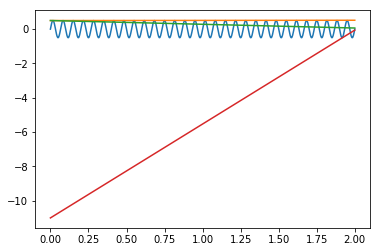

In [12]:
plt.plot(t, ut)
plt.plot(t, X[0,])
plt.plot(t, X[1,])
#plt.plot(t, X_dot[0,])
plt.plot(t, X_dot[1,])
plt.show()

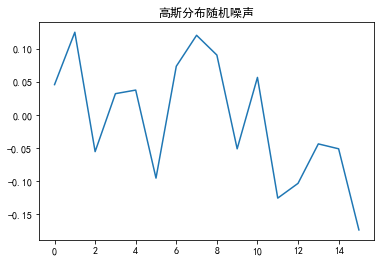

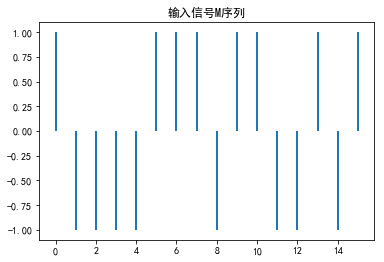

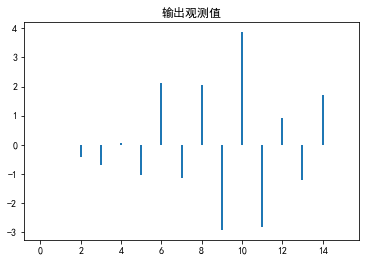

a1的值是： 1.6890033925907515
a2的值是： 0.8351682911714706
b1的值是： 0.8777088374255756
b2的值是： 0.7216186159167262


In [2]:
# -*- coding: utf-8 -*-
"""
Created on Wed Sep 20 16:11:27 2017
@author: Hangingter
"""
#一般最小二乘辨识

#导入相应科学计算的包
import numpy as np
import matplotlib.pyplot as plt
from operator import xor
from numpy.linalg import inv

#显示中文字体
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#产生一组16个N(0,1)的高斯分布的随机噪声
mu=0
sigma=0.1
samplenum=16
n=np.random.normal(mu,sigma,samplenum) 
plt.figure(num=1)
plt.plot(n)
plt.title("高斯分布随机噪声")
#M序列产生
L=16
#设置M序列周期
#定义初始值
y=np.zeros(L)
u=np.zeros(L)
y1=1
y2=1
y3=1
y4=0
for i in range(0,L):
    x1=xor(y3,y4)  
    x2=y1 
    x3=y2  
    x4=y3 
    y[i]=y4  
    if  y[i]>0.5:
        u[i]=-1  
    else:
        u[i]=1   
    y1=x1
    y2=x2
    y3=x3
    y4=x4     
plt.figure(num=2)
x=np.linspace(0,15,16)
plt.bar(x,u,width=0.1)
plt.title('输入信号M序列')
#最小二乘辨识过程
z=np.zeros(16)

for k in range(2,15):   
    z[k]=-1.6*z[k-1]-0.7*z[k-2]+1.0*u[k-1]+0.4*u[k-2]+1.0*n[k]+1.6*n[k-1]+0.7*n[k-2] 
    
plt.figure(num=3) 
plt.bar(x,z,width=0.1)  
plt.title('输出观测值')    

H=np.array([[-z[1],-z[0],u[1],u[0]],[-z[2],-z[1],u[2],u[1]],[-z[3],-z[2],u[3],u[2]],[-z[4],-z[3],u[4],u[3]],[-z[5],-z[4],u[5],u[4]],[-z[6],-z[5],u[6],u[5]],[-z[7],-z[6],u[7],u[6]],[-z[8],-z[7],u[8],u[7]],[-z[9],-z[8],u[9],u[8]],[-z[10],-z[9],u[10],u[9]],[-z[11],-z[10],u[11],u[10]],[-z[12],-z[11],u[12],u[11]],[-z[13],-z[12],u[13],u[12]],[-z[14],-z[13],u[14],u[13]]])
Z=np.array([z[2],z[3],z[4],z[5],z[6],z[7],z[8],z[9],z[10],z[11],z[12],z[13],z[14],z[15]]) 

In_1=np.transpose(H)
In_2=np.dot(In_1,H)
In_3=inv(In_2)
In_4=np.dot(In_3,In_1)
c=np.dot(In_4,Z)
plt.show()
#分离参数并显示
a1=c[0] 
a2=c[1]
b1=c[2]
b2=c[3] 
print("a1的值是：",a1)
print("a2的值是：",a2)
print("b1的值是：",b1)
print("b2的值是：",b2)